# Q-Reply @ Qhack 2021
# A quantum variational approach to data classification:<br>current Quantum Computers maturity and the potential for Quantum Advantage 

In the latest years more and more attention has been drawn to the application of Quantum Computing to Machine Learning. Classical computers are often able to provide high quality solutions, thus enabling businesses to benefit from data-driven and automated approaches. However, if even better results were at hand the profits would be higher and in some situations classical Machine Learning may not be able to provide sufficiently good results at all. For these reasons, the search for higher quality solutions is endless. 

In this framework, Quantum Computing sets itself as a major potential game-changer, opening up a number of possibilities to obtain improved performances when compared to existing classical techniques. This new field, called Quantum Machine Learning, is still in its infancy: Quantum Computers are currently undergoing major engineering improvements and it is not yet clear how and when Machine Learning could benefit from Quantum Computing. 

In this work we extensively explore the well-known (in the Quantum Computing Community!) variational approach for data classification. We analyse the dataset of interest and investigate the impact of different strategies, namely the ansatz and the depth of the Quantum Circuit, with a two-fold goal: 

* Test empirically if the Quantum Computing strategy is able to perform better than classical techniques – Quantum Advantage 
* Investigate whether the fidelity of gates operations and coherence times are sufficiently high for current Quantum Computers to be employed in real or near-real applications 

To do so, we derive most of the results on a simulator, select a strategy and finally run it on Rigetti’s Quantum Processing Unit (QPU). 

A local simulator has been used to run most of the experiments and Rigetti’s ASPEN 9 was employed via AWS Braket. 

### Data used in this project

Rice dataset, taken from:<br>
CINAR, I. and KOKLU, M., (2019). “Classification of Rice Varieties Using Artificial Intelligence Methods.” International Journal of Intelligent Systems and Applications in Engineering, 7(3), 188-194.<br>
(https://doi.org/10.18201/ijisae.2019355381)

Heart-failure dataset, taken from:<br>
Davide Chicco, Giuseppe Jurman: Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020). <br>
(https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5)<br>

# Results on heart-failure dataset

For simplicity we use a reduced version of the dataset, considering only the first 2 principal components (https://en.wikipedia.org/wiki/Principal_component_analysis). This allows us to limit the quantum circuits to few qubits and gates.

## Classical methods 

We start with some classical algorithms (without spending too much time on hyperparameter tuning) to set some baseline scores for the quantum circuit.

| Support vector machines | Random forest classifier |
| :---: | :---: |
| 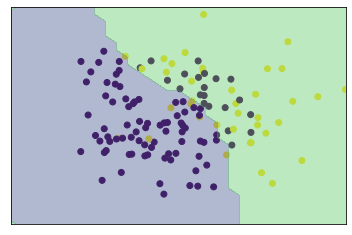<br>Decision boundaries learned by SVM (superimposed on the training data) | 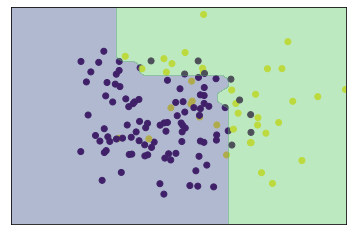<br>Decision boundaries learned by Random Forest (superimposed on the training data) | 
| 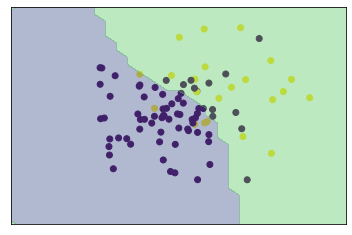<br>Decision boundaries learned by SVM (superimposed on the test data) | 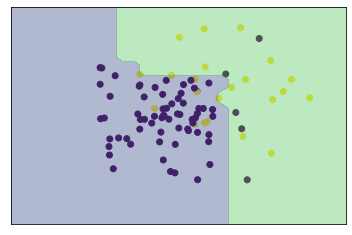<br>Decision boundaries learned by Random Forest (superimposed on the test data) | 
| Accuracy on test set: 78% | Accuracy on test set: 86% |
| Macro-averaged f1 score on test set\* : 0.74 | Macro-averaged f1 score on test set: 0.79 |

\*Since the dataset is imbalanced, the macro-averaged f1 score is shown in addition to the accuracy.

## Quantum variational circuits

After some experiments, we settled on the following quantum circuit. 

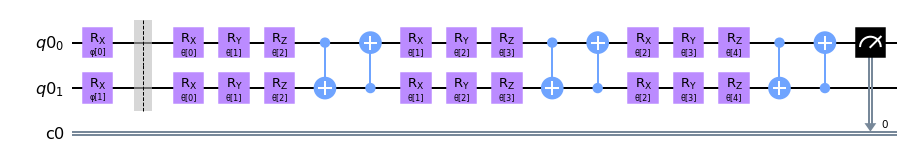

Features are encoded as single qubit rotations, and several strongly entangling layers (3 layers in the picture above) are used as variational layers.

We collect some of the results obtained by changing the number of variational layers and the scale of the features.

| 3 variational layers | 4 variational layers |
| :---: | :---: |
| 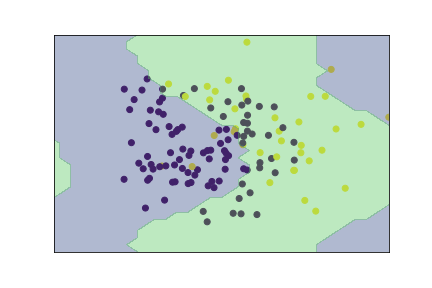<br>Decision boundaries (superimposed on the training data) | <br>Decision boundaries (superimposed on the training data) | 
| 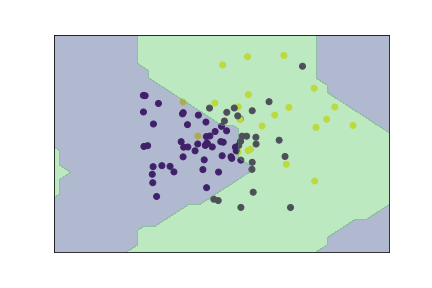<br>Decision boundaries (superimposed on the test data) | <br>Decision boundaries (superimposed on the test data) | 
| Accuracy on test set: 74% | Accuracy on test set: |
| Macro-averaged f1 score on test set: 0.71 | Macro-averaged f1 score on test set: |



# Results on rice dataset

For simplicity we use a reduced version of the dataset, considering only the first 2 principal components (https://en.wikipedia.org/wiki/Principal_component_analysis). This allows us to limit the quantum circuits to few qubits and gates.

## Classical methods 

We start with some classical algorithms (without spending too much time on hyperparameter tuning) to set some baseline scores for the quantum circuit.

| Support vector machines | Random forest classifier |
| :---: | :---: |
| 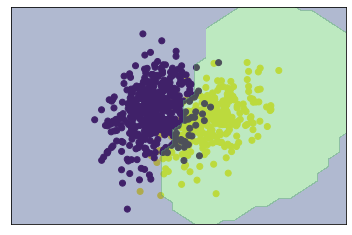<br>Decision boundaries learned by SVM (superimposed on the test data) | 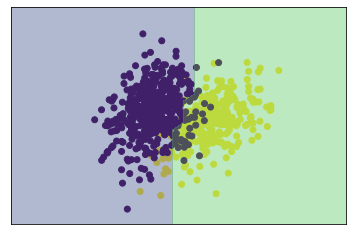<br>Decision boundaries learned by Random Forest (superimposed on the test data) | 
| Accuracy on test set: 91% | Accuracy on test set: 91% |

## Quantum variational circuits

| Boundary decisions learned by circuit. | Boundary decisions learned by same circuit with features rescaled by a factor 2. | Boundary decisions learned by same circuit with features rescaled by a factor 3. |
| :---: | :---: | :---: |
| 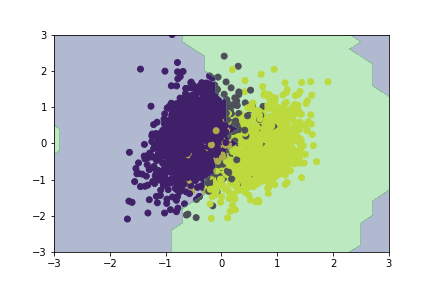 | 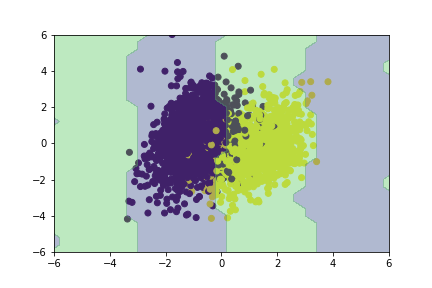 | 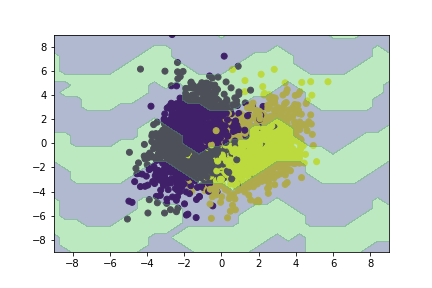 |
| In this case the periodicity of the model can accomodate well the natural scale of the dataset | In this case the periodicity of the model barely matches the natural scale of the dataset | In this case the periodicity of the model cannot match the natural scale of the dataset |
| Accuracy on test set: 89% | Accuracy on test set: 88% | Accuracy on test set: 63% |



# Observations

The following elements greatly affect the result of the circuit

## Scaling the features

The classical features are loaded into the quantum circuit as rotation angles in unitary gates. Suppose that a datapoint is described by the two features $(x, y)$. If $x$ is loaded in the circuit as angle in a single qubit rotation $U(x)$, any value $x + 2 n \pi$ (where $n$ is a natural number) will be indistinguishable from $x$. In other words $U(x) = U(x + 2 n \pi)$. Therefore the circuit learns periodic decision boundaries and one should be careful in choosing the scale of the dataset, so that the periodicity of the decision boundary can match the scale of the dataset (or any natural periodicity present in the dataset).

See the results on the rice dataset to get a visual explanation of this.

## Shape of the decision boundaries

The shape of the decision boundaries is influenced by the type of gates and the number of layers present in the circuit. Adding more layers with rotations along different axis gives more freedom to the circuit, at the cost of having more variational parameters and slowing down the training phase.

We can see this in the heart-failure dataset example. The variational circuit with 4 entangling layers can find a better shape for the boundary, compared to the circuit with 3 entangling layers.

# How good can a variational quantum classifier perform?

We train circuit as following

* The 2 features are encoded in 2 qubits using the BasicEntanglerLayers
* StornglyEntanglingLayers are used with variational parameters that are learned
* The expectation value of PauliZ is measured on the first qubit
* The measurement value is rescaled to the range \[0, 1\] to match the labels
* A loss is introduced to compare the circuit output to the labels

## Effects on the performance

The following elements greatly affect the result of the circuit

* Operations in the circuit (e.g. only X rotations don't introduce much entanglement)
* Postprocessing and loss function (e.g. linear transformation + squareloss; sigmoid + logloss)
* Feature scaling (this affect the periodicity of the decision boundaries)

Because data is loaded into the quantum circuit as rotation angles, one has to be careful with the scale of the features. Suppose that a datapoint is described by the two features $(x, y)$. If $x$ is loaded in the circuit as angle in a single qubit rotation $U(x)$, any value $x + 2 n \pi$ (where $n$ is a natural number) will be indistinguishable from $x$. In other words $U(x) = U(x + 2 n \pi)$. Therefore the circuit can only learn periodic boundary decisions and this period should match the scale of the dataset (or any natural periodicity present in the dataset).